In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Annotations

In [15]:
# with open('../annotations/lavina_class.TextGrid') as f:
#     annotation = [l.strip() for l in f.readlines()]

In [16]:
with open('../annotations/dtp.TextGrid') as f:
    annotation = [l.strip() for l in f.readlines()]

In [17]:
indxs = [i for i, l in enumerate(annotation) if l == '"IntervalTier"']
annotation = annotation[indxs[0] + 5:indxs[1]]

In [18]:
annotation_dicts = []

for s, e, l in zip(annotation[0::3], annotation[1::3], annotation[2::3]):
    annotation_dicts.append({
        'start': float(s),
        'finish': float(e),
        'label': l.replace('"', ''),
        'length': float(e) - float(s)
    })

In [19]:
df = pd.DataFrame(annotation_dicts)

In [20]:
df[['label', 'length']].groupby('label').describe()

length                                                               \
       count      mean        std       min       25%       50%       75%   
label                                                                       
       135.0  7.403509  14.072953  0.202883  1.439769  2.702016  5.920749   
a      108.0  0.329626   0.100457  0.152162  0.259944  0.317005  0.356630   
b       24.0  0.189675   0.055929  0.095101  0.145822  0.187033  0.218733   

                  
             max  
label             
       92.619594  
a       0.798852  
b       0.304325

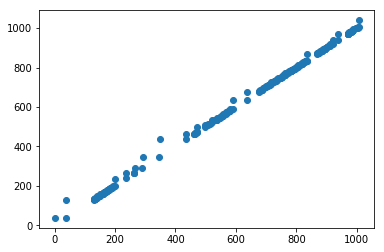

In [21]:
plt.scatter(df.start, df.finish)

# Audio

In [22]:
import glob
import os
import librosa
import numpy as np
from matplotlib.pyplot import specgram

In [23]:
# audio, sr = librosa.load('../audio/lavina_class.m4a')

In [24]:
audio, sr = librosa.load('../audio/dtp.m4a')

In [25]:
sr

22050

In [26]:
def get_label_data(annotations, audio, label, sr):
    start_samples_indxs = librosa.time_to_samples(annotations[annotations.label == label].start.values, sr)
    finish_samples_indxs = librosa.time_to_samples(annotations[annotations.label == label].finish.values, sr)
    
    data = []
    for s, f in zip(start_samples_indxs, finish_samples_indxs):
        data.append(audio[np.arange(s, f)])
    return data

In [27]:
data_a = get_label_data(df, audio, 'a', sr)
merged_data_a = np.hstack(data_a)
librosa.output.write_wav('../demo/label_a3.wav', merged_data_a, sr)

In [28]:
data_b = get_label_data(df, audio, 'b', sr)
merged_data_b = np.hstack(data_b)
librosa.output.write_wav('../demo/label_b3.wav', merged_data_b, sr)